# Аналитика ЕГЭ  
## версия 2.5
### данная программа открывает файл (файлы) из папки ege и считывает данные (файлы в таблице *.xls).
### программа создает новый файл в формате analytics.xlsx 

## Программа выдает статистику по следующим пунктам
1. количество участников
2. средний балл
3. количество не сдавших экзамен
4. количество набравших минимальный проходной балл
5. количество высокобальников
6. какой минимальный балл получили на экзамене
7. какой максимальный балл получили на экзамене
8. количество участников набравших соответствующий балл
9. % выполнения отдельных заданий 1 части (в виде таблицы и графика)
10. % выполнения отдельных заданий 2 части

In [67]:
#подключаем библиотеки
import os
import pandas as pd
import numpy as np

### Считываем файлы из папки
#### (файлы должны быть по одному предмету)

In [68]:
import os
f  = os.listdir()
Files = ['./ege/'+i for i in os.listdir('./ege') if 'xls' in i]
if Files:
    print(Files)
else:
    print('папка пустая')

['./ege/информ.xls', './ege/информ3.xls', './ege/информ2.xls']


## Удаляем лишние столбцы, переименовываем их и формируем все данные в один DataFrame

In [69]:
cols = ['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball']
df = pd.DataFrame(columns=['kod','kod2','class','kodPPE','room','Last name', 'First name', 'Second name','doc_s','doc_number','result_1','result_2','first_ball','ball'])
for i in Files:
    table = pd.read_excel(i.strip(), header = 6)
    table.drop(table.columns[[0, 1,3,5,7,9,11,15,17,19,21,23,25]], axis=1, inplace=True)
    table.columns = cols
    # функция dropna удаляет строки где есть значения NaN 
    table = table.dropna(subset=['kod'])
    df = df.append(table)
# строчка ниже делает индексацию строк сначала и правильно
# т.к. после удаление не корректных строк происходит сбой в нумерации
df.index = np.arange(len(df))
df.head()

,kod,kod2,class,kodPPE,room,Last name,First name,Second name,doc_s,doc_number,result_1,result_2,first_ball,ball
0,901.0,404004.0,11Б,802.0,209.0,Паульс,Артур,Владимирович,3214.0,446013.0,+++--++++--++++-+-+--+-,0(3)0(2)1(3)0(4),15.0,57.0
1,901.0,404004.0,11Б,802.0,205.0,Панина,Виктория,Вячеславовна,3214.0,446917.0,+++++++++++++++++-++++-,3(3)0(2)2(3)0(4),26.0,77.0
2,901.0,404004.0,11Б,802.0,205.0,Медведчиков,Максим,Николаевич,3214.0,445993.0,+++++-++--+-+++-+----+-,3(3)2(2)0(3)0(4),18.0,62.0
3,901.0,404004.0,11Б,802.0,209.0,Шакмарёв,Константин,Евгеньевич,3214.0,446290.0,+--+--+++-+++-+++----+-,0(3)0(2)0(3)0(4),12.0,51.0
4,901.0,404004.0,11Б,802.0,207.0,Солопов,Вадим,Евгеньевич,3214.0,446613.0,+++++-+++++++++++++-++-,2(3)2(2)3(3)1(4),28.0,81.0


In [71]:
df.shape

(39, 14)

In [72]:
min_ball = int(input('Введите минимальный проходной балл по предмету -> '))

Введите минимальный проходной балл по предмету -> 40


# Отчет по пунктам 1 - 7

In [73]:
print('1. Количество участников:',len(df))
print('2. Средний балл:',df['ball'].sum()/len(df))
print('3. Количество не сдавших экзамен:',(df.ball < min_ball).sum())
print('4. Количество набравших минимальный проходной балл:',(df.ball == min_ball).sum())
print('5. Количество высокобальников:',(df.ball > 80).sum())
print('6. Минимальный балл:',(df.ball).min())
print('7. Максимальный балл:',(df.ball).max())

1. Количество участников: 39
2. Средний балл: 69.2051282051282
3. Количество не сдавших экзамен: 6
4. Количество набравших минимальный проходной балл: 0
5. Количество высокобальников: 15
6. Минимальный балл: 35.0
7. Максимальный балл: 84.0


# 8. количество участников набравших соответствующий балл

# 9. % выполнения отдельных заданий 1 части (в виде таблицы и графика)
### готовим шапку таблицы
# шапку таблицы нужно сделать не зависимой

In [74]:
# количество заданий в первой части
number = len(table.result_1[1])
# готовим шапку
table2 = pd.DataFrame(columns=['Last name'] + [str(i+1) for i in range(number)]+['summa'])
table2.head()

,Last name,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,summa



## Обрабатываем данные для одного или более файлов единного предмета

In [75]:
# Функция перевода + и - в 1 и 0
# в некоторых предметах кроме + и - встречаются цифры (они останутся без изменений)
def plusToNum(s):
    st=''
    for i in s:
        if i == '+':
            st+='1'
        elif i == '-': 
            st +='0'
        else:
            st += i
    arr = [int(i) for i in st]
    return arr

In [76]:
row = 0

for t,k in enumerate(df['result_1']):
    buf = plusToNum(k)
    table2.loc[t+row] = [df['Last name'][t]]+[j for j in buf]+[sum(buf)]
row += t+1
table2[:2]

,Last name,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,summa
0,Паульс,1,1,1,0,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,14
1,Панина,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,21


In [77]:
table2.shape

(39, 25)

## Пробую добавить строку с суммой по заданиям

In [78]:
test=[]
for i in range(1,number+1):
    test.append(table2[str(i)].sum())
#test
table2.loc[row] = ['sum']+[j for j in test]+[' ']
table2[-3:]

,Last name,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,summa
37,Дворецкая,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,17
38,Быков,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,21
39,sum,39,30,36,33,33,27,39,39,36,...,39,30,39,15,27,9,30,30,12,


## добавим строку с процентами

In [79]:
max(table2[str(1)][:-2])

1

In [80]:
# функция max расчитывает самый большой балл в столбце
B = [(i * 100 / row / max(1,max(table2[str(j)][:-2])))  for j, i in enumerate (table2.loc[row][1:-1],1)]
table2.loc[row+1] = ['%']+[j for j in B]+[' ']
table2[-5:]

,Last name,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,summa
36,Дорохов,1,0,1,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,0,18
37,Дворецкая,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,17
38,Быков,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,21
39,sum,39,30,36,33,33,27,39,39,36,...,39,30,39,15,27,9,30,30,12,
40,%,100,76.9231,92.3077,84.6154,84.6154,69.2308,100,100,92.3077,...,100,76.9231,100,38.4615,69.2308,23.0769,76.9231,76.9231,30.7692,


In [81]:
table2.shape

(41, 25)

# Визуализация 1 части

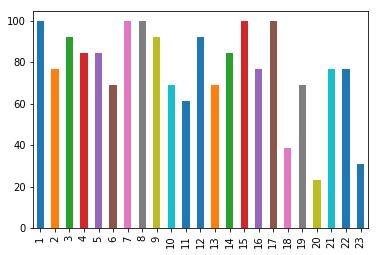

In [387]:
# вызуализация
q = table2.loc[len(table2)-1][1:-1]
q.plot(kind='bar'); #столбчатая диаграмма

## Визуализация в mathplotlib

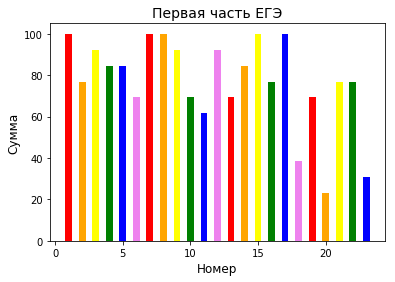

In [388]:
colorsr = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
import matplotlib.pyplot as plt
num = [i for i in range(1,number+1)]
# формируем строку с процентами
sums = pd.Series(table2.loc[len(table2)-1][1:-1])
plt.bar(num, sums, width = 0.5, color = colorsr)
plt.title("Первая часть ЕГЭ", fontsize=14)
plt.xlabel("Номер", fontsize=12)
plt.ylabel("Сумма", fontsize=12)
plt.show()

In [346]:
#сохраним новую таблицу на диск
table2.to_excel('analytics.xlsx')

# 10. % выполнения отдельных заданий 2 части